In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Problem 1: Multiclass Logistic Regression (IRIS)

## 1.a and 1.b Data Processing

In [2]:
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
X = pd.DataFrame(X, columns=iris.feature_names)
y = pd.DataFrame(y, columns=['target'])

def train_test_split(X, y, split=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_index = int(X.shape[0] * (1 - split))
    X_train = X.iloc[indices[:split_index]]
    y_train = y.iloc[indices[:split_index]]
    X_test = X.iloc[indices[split_index:]]
    y_test = y.iloc[indices[split_index:]]
    
    return X_train, y_train, X_test, y_test

def normalize_fature_vals(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)


def standardise_fature_vals(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    return (X - X_mean) / X_std

X_normalized = normalize_fature_vals(X) 
X_standardized = standardise_fature_vals(X)

print(X.head().to_markdown())
print()
print(X_normalized.head().to_markdown())
print()
print(X_standardized.head().to_markdown())


# i= 3
# plt.plot(X[:, i], 'ro')
# plt.plot(normalize_fature_vals(X)[:, i], 'bo')
# plt.plot(standardise_fature_vals(X)[:, i], 'go')

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |
|  3 |                 4.6 |                3.1 |                 1.5 |                0.2 |
|  4 |                 5   |                3.6 |                 1.4 |                0.2 |

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|
|  0 |           0.222222  |           0.625    |           0.0677966 |          0.0416667 |
|  1 |           0.166667  |           0.416667 |           0.0677966

## 1.b and 1.c Softmax and Multicalss Logistic Regression

To the feaeture amtrix, we add a column of ones to account for the bias term. X is a $m\times (d+1)$ matrix, where $m$ is the number of samples and $d$ is the number of features. The first column of $X$ is all ones. The target variable $y$ is a $m \times k$ matrix, where $k$ is the number of classes. Each row of y is a one-hot encoded vector representing the class label for that sample.

The cross entropy loss function is given by the following where, $m$ is the number of samples and $k$ is the number of classes.
$$ L = -\frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{k} y_{ij}\log{\hat{y}_{ij}}$$

In gradient descent, we update the parameters according to the following update rule:
$$ 
    {W}_{new} = W_{old} - \alpha \frac{\partial L}{\partial W}
$$

$\hat{y}_i = softmax(WX)_i$ is a $k$-dimensional vector, where each entry $\hat{y}_{ij}$ is the predicted probability of sample $i$ belonging to class $j$. The softmax function is given by:
$$
    \hat{y}_{ij} = \frac{e^{({W^T x^{(i)}})_j}}{\sum_{t=1}^{k} e^{{({W^T x^{(t)}})}_j}} = \frac{e^{z_j}}{\sum_{t=1}^{k} e^{{z}_j}}
$$
The gradient of the loss function with respect to the parameters is given by:
$$
    \frac{\partial L}{\partial W} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial W} 
$$

Now we perform the computations to find out the gradient for the cross entropy loss.

### Derivative of the softmax wrt W $\left( \frac{\partial \hat{y}}{\partial W} \right)$ 



### Training the model

In [3]:
def one_hot_encode(y):
    num_classes = np.max(y) + 1
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y.values.flatten()] = 1
    return one_hot

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def categorical_cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

def train_logistic_regression_gd(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    k = y.shape[1]

    W = np.zeros([n, k]) 
    loss_history = []

    for epoch in range(epochs):
        logits = np.dot(X, W)
        y_pred = softmax(logits)

        loss = categorical_cross_entropy_loss(y, y_pred)
        loss_history.append(loss)

        dW = (1 / m) * np.dot(X.T, (y_pred - y))
        W -= learning_rate * dW

        if epoch % 100 == 0:
            print(f"GD Epoch {epoch}/{epochs}, Loss: {loss:f}")

    return W, loss_history

def train_logistic_regression_sgd(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    k = y.shape[1]

    W = np.zeros([n, k]) 
    loss_history = []

    for epoch in range(epochs):
        total_loss = 0

        for i in range(m):
            x_i = X[i].reshape(1, -1)
            y_i = y[i].reshape(1, -1)

            logits = np.dot(x_i, W)
            y_pred = softmax(logits)

            loss = categorical_cross_entropy_loss(y_i, y_pred)
            total_loss += loss

            dW = np.dot(x_i.T, (y_pred - y_i))
            W -= learning_rate * dW

        avg_loss = total_loss / m
        loss_history.append(avg_loss)

        if epoch % 100 == 0:
            print(f"SGD Epoch {epoch}/{epochs}, Loss: {avg_loss:f}")

    return W, loss_history


def predict(X, W):
    logits = np.dot(X, W)
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)


# Unprocessed Features

GD Epoch 0/1000, Loss: 1.098612
GD Epoch 100/1000, Loss: 0.714277
GD Epoch 200/1000, Loss: 0.587039
GD Epoch 300/1000, Loss: 0.522939
GD Epoch 400/1000, Loss: 0.481973
GD Epoch 500/1000, Loss: 0.452048
GD Epoch 600/1000, Loss: 0.428384
GD Epoch 700/1000, Loss: 0.408717
GD Epoch 800/1000, Loss: 0.391830
GD Epoch 900/1000, Loss: 0.377001
SGD Epoch 0/1000, Loss: 0.897993
SGD Epoch 100/1000, Loss: 0.138669
SGD Epoch 200/1000, Loss: 0.114319
SGD Epoch 300/1000, Loss: 0.105795
SGD Epoch 400/1000, Loss: 0.101622
SGD Epoch 500/1000, Loss: 0.099249
SGD Epoch 600/1000, Loss: 0.097781
SGD Epoch 700/1000, Loss: 0.096822
SGD Epoch 800/1000, Loss: 0.096172
SGD Epoch 900/1000, Loss: 0.095719
Accuracy GD: 0.9667
Accuracy SGD: 0.9667
Classification reprort GD:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        12

    accuracy                

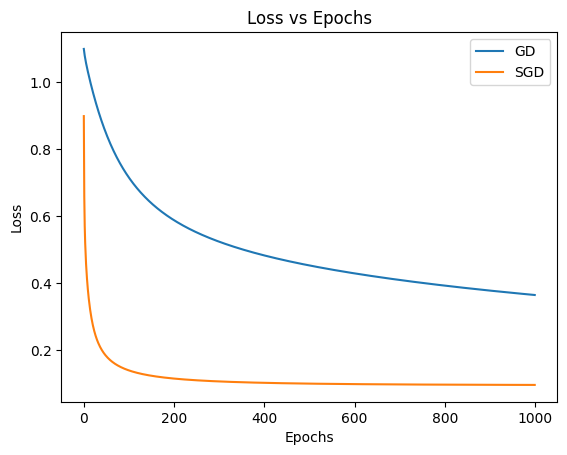

In [4]:
# for unprocessed features

X_train, y_train, X_test, y_test = train_test_split(X, y, split=0.2)
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)


W_gd, loss_gd = train_logistic_regression_gd(X_train, y_train_one_hot)
W_sgd, loss_sgd = train_logistic_regression_sgd(X_train, y_train_one_hot)    


y_pred_gd = predict(X_test, W_gd)
y_pred_sgd = predict(X_test, W_sgd)
y_test = np.array(y_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"Accuracy GD: {accuracy_gd:.4f}")
print(f"Accuracy SGD: {accuracy_sgd:.4f}")
print("Classification reprort GD:")
print(classification_report(y_test, y_pred_gd))
print("Classification reprort SGD:")
print(classification_report(y_test, y_pred_sgd))
plt.plot(loss_gd, label='GD')
plt.plot(loss_sgd, label='SGD')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Normalized Features


GD Epoch 0/1000, Loss: 1.098612
GD Epoch 100/1000, Loss: 1.044574
GD Epoch 200/1000, Loss: 1.005045
GD Epoch 300/1000, Loss: 0.973669
GD Epoch 400/1000, Loss: 0.947229
GD Epoch 500/1000, Loss: 0.924031
GD Epoch 600/1000, Loss: 0.903146
GD Epoch 700/1000, Loss: 0.884035
GD Epoch 800/1000, Loss: 0.866365
GD Epoch 900/1000, Loss: 0.849921
SGD Epoch 0/1000, Loss: 1.068163
SGD Epoch 100/1000, Loss: 0.505045
SGD Epoch 200/1000, Loss: 0.461424
SGD Epoch 300/1000, Loss: 0.440111
SGD Epoch 400/1000, Loss: 0.426193
SGD Epoch 500/1000, Loss: 0.416065
SGD Epoch 600/1000, Loss: 0.408276
SGD Epoch 700/1000, Loss: 0.402082
SGD Epoch 800/1000, Loss: 0.397042
SGD Epoch 900/1000, Loss: 0.392873
Accuracy GD: 0.7667
Accuracy SGD: 0.8333
Classification reprort GD:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00         7
           2       0.65      1.00      0.79        13

    accuracy                

/home/vishnu/Desktop/Ashoka/sem_4/IML/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vishnu/Desktop/Ashoka/sem_4/IML/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vishnu/Desktop/Ashoka/sem_4/IML/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

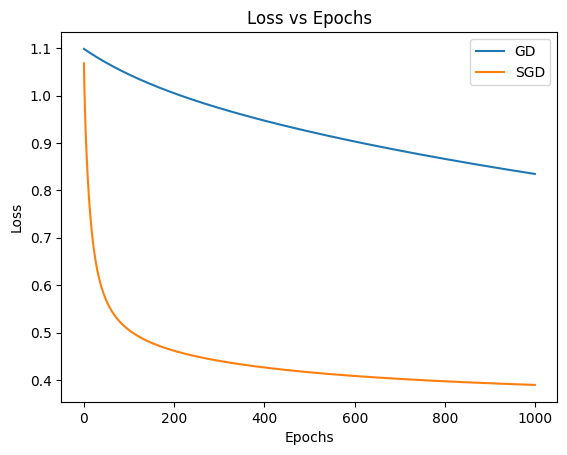

In [5]:
# for normalised features

X_normalized = normalize_fature_vals(X)
X_train, y_train, X_test, y_test = train_test_split(X_normalized, y, split=0.2)
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)


W_gd, loss_gd = train_logistic_regression_gd(X_train, y_train_one_hot)
W_sgd, loss_sgd = train_logistic_regression_sgd(X_train, y_train_one_hot)    



y_pred_gd = predict(X_test, W_gd)
y_pred_sgd = predict(X_test, W_sgd)
y_test = np.array(y_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"Accuracy GD: {accuracy_gd:.4f}")
print(f"Accuracy SGD: {accuracy_sgd:.4f}")
print("Classification reprort GD:")
print(classification_report(y_test, y_pred_gd))
print("Classification reprort SGD:")
print(classification_report(y_test, y_pred_sgd))
plt.plot(loss_gd, label='GD')
plt.plot(loss_sgd, label='SGD')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Standardized Features

GD Epoch 0/1000, Loss: 1.098612
GD Epoch 100/1000, Loss: 0.598804
GD Epoch 200/1000, Loss: 0.480812
GD Epoch 300/1000, Loss: 0.429448
GD Epoch 400/1000, Loss: 0.400120
GD Epoch 500/1000, Loss: 0.380863
GD Epoch 600/1000, Loss: 0.367107
GD Epoch 700/1000, Loss: 0.356710
GD Epoch 800/1000, Loss: 0.348525
GD Epoch 900/1000, Loss: 0.341880
SGD Epoch 0/1000, Loss: 0.747567
SGD Epoch 100/1000, Loss: 0.267955
SGD Epoch 200/1000, Loss: 0.259124
SGD Epoch 300/1000, Loss: 0.255075
SGD Epoch 400/1000, Loss: 0.252841
SGD Epoch 500/1000, Loss: 0.251477
SGD Epoch 600/1000, Loss: 0.250572
SGD Epoch 700/1000, Loss: 0.249928
SGD Epoch 800/1000, Loss: 0.249442
SGD Epoch 900/1000, Loss: 0.249059
Accuracy GD: 0.7333
Accuracy SGD: 0.7667
Classification reprort GD:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.70      0.58      0.64        12
           2       0.69      0.79      0.73        14

    accuracy                

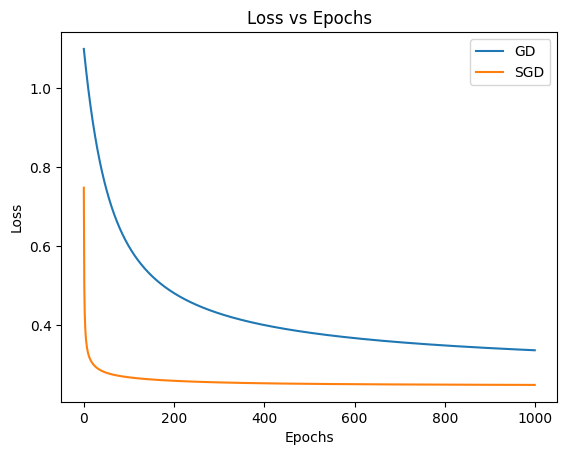

In [6]:
# for standardised features

X_standardized = standardise_fature_vals(X)
X_train, y_train, X_test, y_test = train_test_split(X_standardized, y, split=0.2)
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)


W_gd, loss_gd = train_logistic_regression_gd(X_train, y_train_one_hot)
W_sgd, loss_sgd = train_logistic_regression_sgd(X_train, y_train_one_hot)    



y_pred_gd = predict(X_test, W_gd)
y_pred_sgd = predict(X_test, W_sgd)
y_test = np.array(y_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"Accuracy GD: {accuracy_gd:.4f}")
print(f"Accuracy SGD: {accuracy_sgd:.4f}")
print("Classification reprort GD:")
print(classification_report(y_test, y_pred_gd))
print("Classification reprort SGD:")
print(classification_report(y_test, y_pred_sgd))
plt.plot(loss_gd, label='GD')
plt.plot(loss_sgd, label='SGD')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Problem 5: Linear and Polynomial Regression (Concrete)

## 5.a Data Processing

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 



{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [8]:
X['Blast Furnace Slag'] = X['Blast Furnace Slag'].astype(float)
X['Age'] = X['Age'].astype(float)


/tmp/ipykernel_8091/3276542902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Blast Furnace Slag'] = X['Blast Furnace Slag'].astype(float)
/tmp/ipykernel_8091/3276542902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].astype(float)


In [9]:
X.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0


In [10]:
def split_data(X,y, split=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    split_index = int(X.shape[0] * (1-split))
    
    X_train = X.iloc[indices[:split_index]]
    y_train = y.iloc[indices[:split_index]]
    X_test = X.iloc[indices[split_index:]]
    y_test = y.iloc[indices[split_index:]]
    
    return X_train, y_train, X_test, y_test



## 5.b and 5.c Polynomial Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, y_train, X_test, y_test = split_data(X, y, split=0.2)

metrics = {}
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nErrors for linear regression:')
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
metrics['linear_reg'] = (mse,r2, y_pred)

degrees = [2,3,4]

for deg in degrees:
    featuretransform = PolynomialFeatures(degree = deg)
    train_transformed_features = featuretransform.fit_transform(X_train)
    test_transformed_features = featuretransform.transform(X_test)
    model = LinearRegression()

    model.fit(train_transformed_features, y_train)
    y_pred = model.predict(test_transformed_features)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nErrors for polynomial regression with degree {deg}:')
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    metrics[f'poly_reg_{deg}'] = (mse,r2, y_pred)





Errors for linear regression:
Mean Squared Error: 100.82007924682185
R^2 Score: 0.6230532895143263

Errors for polynomial regression with degree 2:
Mean Squared Error: 59.362636111672174
R^2 Score: 0.7780546238882443

Errors for polynomial regression with degree 3:
Mean Squared Error: 35.60749165505837
R^2 Score: 0.8668704989294735

Errors for polynomial regression with degree 4:
Mean Squared Error: 574.6158114074503
R^2 Score: -1.1483770050688844


## 1.d Results and Comparing Models

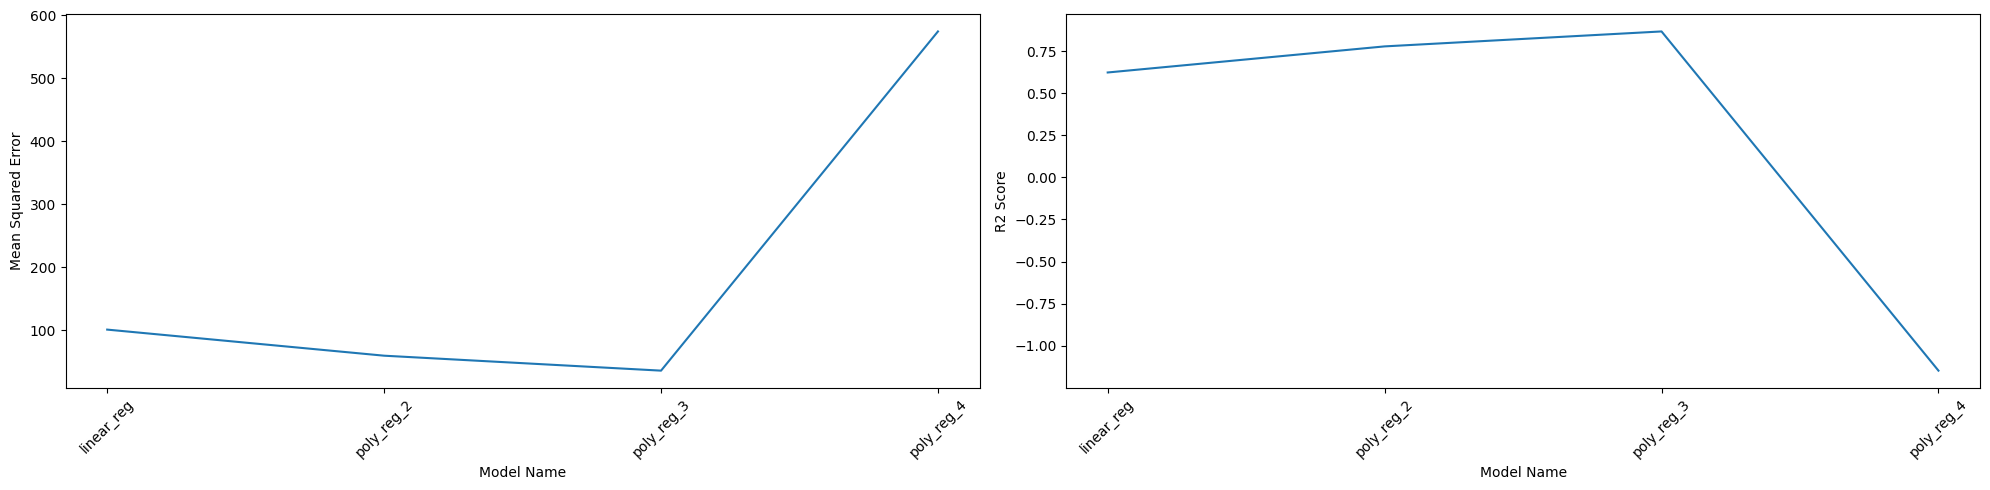

In [12]:
mse_list = [metrics[model_name][0] for model_name in metrics]
r2_list = [metrics[model_name][1] for model_name in metrics]

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(metrics.keys(), mse_list)
ax[0].set_xlabel('Model Name')
ax[0].set_ylabel('Mean Squared Error')
ax[0].tick_params(axis='x', rotation=45)

ax[1].plot(metrics.keys(), r2_list)
ax[1].set_xlabel('Model Name')
ax[1].set_ylabel('R2 Score')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

    


### Visualising the data

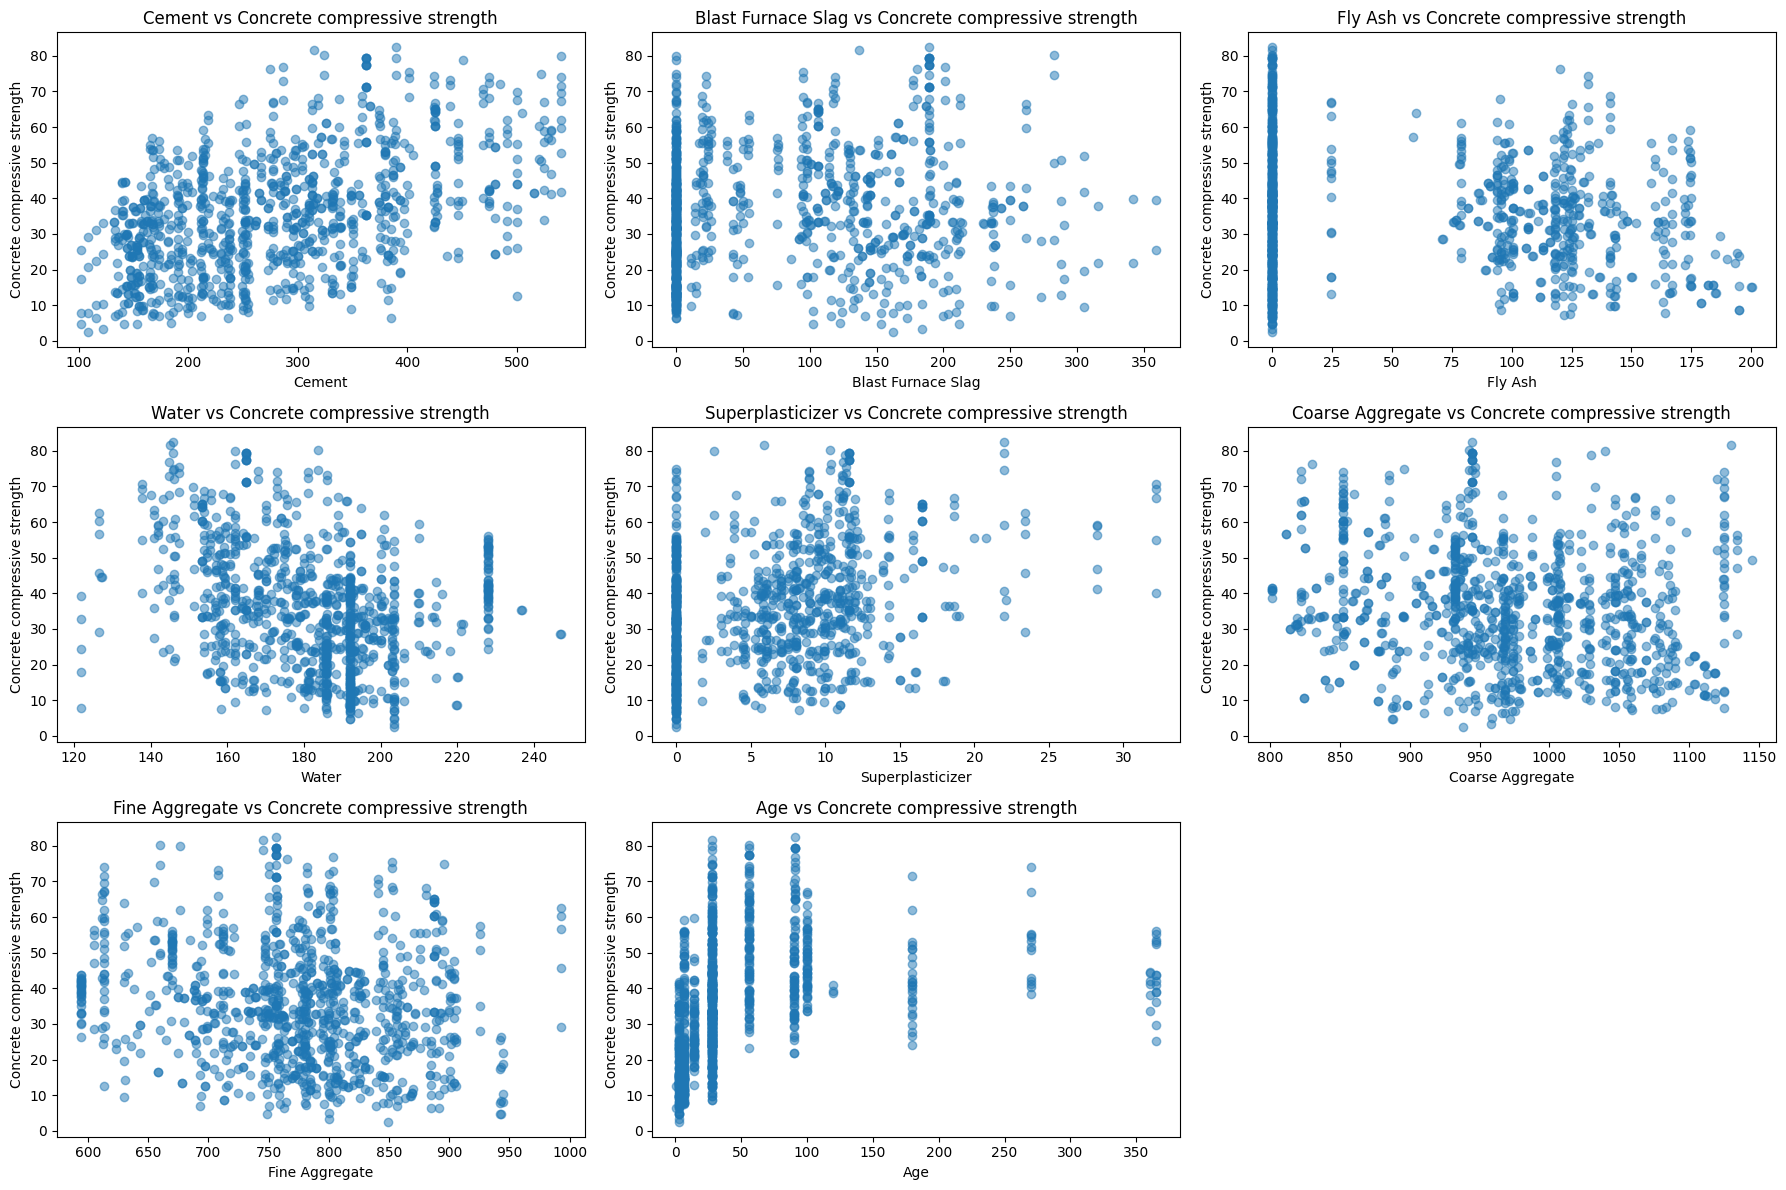

In [ ]:
import math

# plot every feature vs target
n_features = len(X.columns)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Concrete compressive strength")
    axes[i].set_title(f"{col} vs Concrete compressive strength")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


the polynomials cant be visualised as they are degree {1,2,3,4} polynomials in 7 variables. 

## 1.e Bias-Variance Tradeoff analysis

To compute the bias and variance, we will use the following formulas:
$$
    \text{Variance} = \mathbb{E}[(\hat{y} - \mathbb{E}[\hat{y}])^2]
$$
$$
    \text{Bias} = [(\mathbb{E}[\hat{y}] - y)^2]
$$



Model: linear_reg, Bias: 100.82007924682185, Variance: 168.00463309325653, Error: 268.82471234007835
Model: poly_reg_2, Bias: 59.362636111672174, Variance: 207.75834755272433, Error: 267.1209836643965
Model: poly_reg_3, Bias: 35.60749165505837, Variance: 234.70525033580188, Error: 270.3127419908602
Model: poly_reg_4, Bias: 574.6158114074503, Variance: 743.6704771384934, Error: 1318.2862885459438


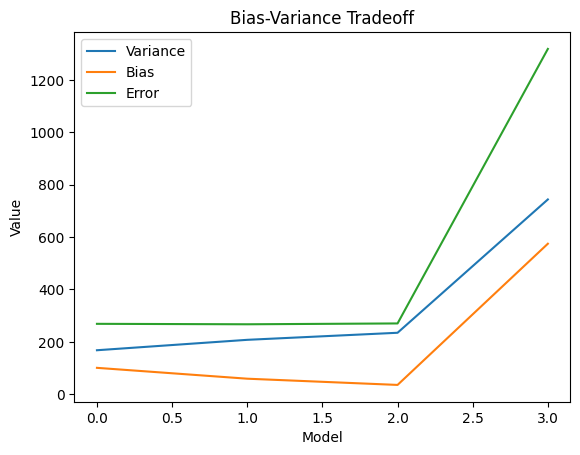

In [24]:
vs, bs, es = [], [], []
for model in metrics:
    y_pred = metrics[model][2]
    variance = np.mean(np.square(y_pred - np.mean(y_pred)))
    bias = np.mean(np.square(y_pred - y_test))
    vs.append(variance)
    bs.append(bias)
    es.append(bias + variance)
    print(f"Model: {model}, Bias: {bias}, Variance: {variance}, Error: {bias+variance}")

plt.plot(vs)
plt.plot(bs)
plt.plot(es)
plt.legend(['Variance', 'Bias', 'Error'])
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Bias-Variance Tradeoff')
plt.show()

1.e.i) 
The model with low variance and a high bias is linear regression 

The model with high variance and a low bias is polynomial regression of degree three 

The model that achieves a good balance between bias and variance is polynomial regression of degree two 

1.e.ii)
The reason why the higher degree polynomial regression tends to overfit the data is because the higher degree allows the polynomial to fit the curve to the given data better, reducing the variance. in fact with a degree n polynomial regression, the model can fit n points exactly and achieve 0 bias. The lower bias and overfitting makes the model more sensitive to noise which leads to bigger errors while predicting port the train phase. This increases the variance.




# Problem 3: Gaussians

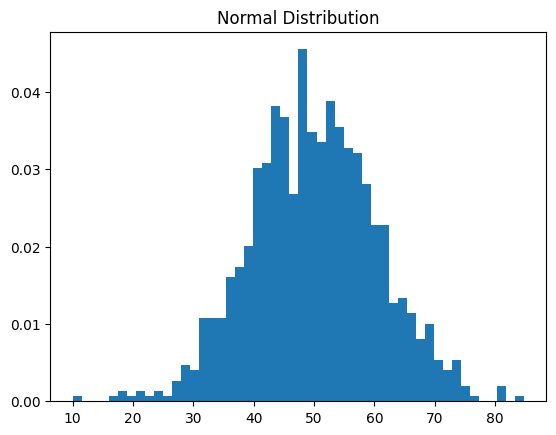

In [14]:
samples = np.random.normal(50, 10, 1000)
plt.hist(samples, bins=50, density=True)
plt.title("Normal Distribution")
plt.show()

## 3.b Maximum likelihood estimation

The likelihood function is given by:
$$
    L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} = \frac{1}{(2\pi\sigma^2)^{n/2}} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2}
$$
Taking the log of the likelihood function, we get:
$$
    \log{L(\mu, \sigma^2)} = -\frac{n}{2} \log{(2\pi\sigma^2)} - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$
Taking the derivative with respect to $\mu$ and $\sigma^2$, and equating to zero, we get the following equations. First, we take the derivative with respect to $\mu$:
$$
\begin{split}
    \frac{\partial L}{\partial \mu} & = 0 - \frac{1}{2\sigma^2} \sum_{i=1}^{n} \left(2(x_i - \mu)  \frac{\partial (-\mu)}{\partial \mu}\right) \\
    &= \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) = 0 \\
    \implies n \mu &= \sum_{i=1}^{n} x_i \\
    \mu &= \frac{1}{n} \sum_{i=1}^{n} x_i
\end{split}
$$
Now for the variance, we take the derivative with respect to $\sigma^2$:
$$
\begin{split}
    \frac{\partial L}{\partial \sigma^2} &= -\frac{n}{2} \frac{1}{\sigma^2} \cdot (2\sigma) - \frac{-2}{2\sigma^3} \sum_{i=1}^{n} (x_i - \mu)^2 \\
    &= -\frac{n}{\sigma} + \frac{1}{\sigma^3} \sum_{i=1}^{n} (x_i - \mu)^2 = 0 \\
    \implies n \sigma^2 &= \sum_{i=1}^{n} (x_i - \mu)^2 \\
    \sigma^2 &= \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
\end{split}
$$

In [15]:
def normal_mle(samples):
    mu = sum(samples) / len(samples)    
    shifted = (samples - mu)**2
    sigma = np.sqrt(sum(shifted)/len(samples))
    print(mu, sigma)
    return mu, sigma
normal_mle(samples)

50.033170474140285 10.430861024563441


(np.float64(50.033170474140285), np.float64(10.430861024563441))

50.033170474140285 10.430861024563441


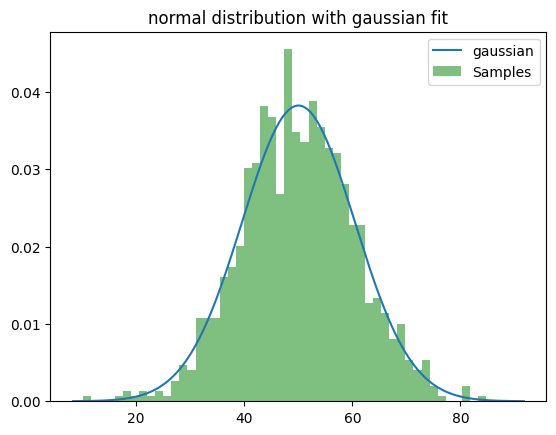

In [16]:
def plot_samples_with_normal_fit(mu, sigma, samples):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

    plt.plot(x, y, label='gaussian')
    plt.hist(samples, bins=50, density=True, color='g', alpha=0.5, label='Samples')
    plt.title("normal distribution with gaussian fit")
    plt.legend()
    plt.show()

mu, sigma = normal_mle(samples)
plot_samples_with_normal_fit(mu, sigma, samples)

In [17]:
outliers = np.random.uniform(100,150, 50)
samples_with_outliers = np.concatenate([samples, outliers])



53.56062940532226 19.032109709929436


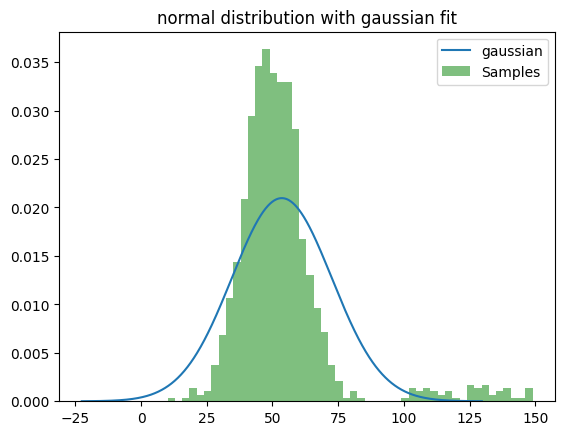

In [18]:
nmu, nsigma = normal_mle(samples_with_outliers)
plot_samples_with_normal_fit(nmu, nsigma, samples_with_outliers)

We see that adding the outliers only affects the mean slightly but the variance has significantly changed. The mean doesnt change much as the unbiased sample size is large. So the curve flattens a little and the fit is worse. To detect the outliers, we can look at the zscores. The numerator is the distance of the sample from the mean, as we see that the mean of the original and biased distributions arent far off. Dividing this by sigma indicates the numebr of standard deviations taht the sample is off from the mean.

Outliers: 50
Inliers: 1000


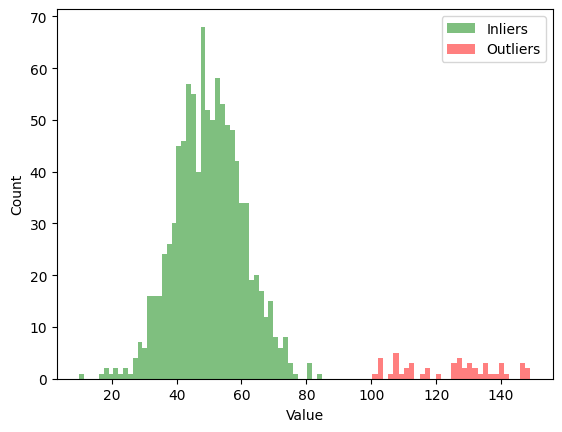

In [19]:
classified_inliers = []
classified_outliers = []
mean, std = np.mean(samples_with_outliers), np.std(samples_with_outliers)
for i in samples_with_outliers:
    zscore = (i - mean) / std
    if zscore > 2:
        classified_outliers.append(i)
    else:
        classified_inliers.append(i)
print(f"Outliers: {len(classified_outliers)}")
print(f"Inliers: {len(classified_inliers)}")
plt.hist(classified_inliers, bins=50, color='g', alpha = 0.5, label='Inliers')
plt.hist(classified_outliers, bins=30, color='r', alpha = 0.5, label='Outliers')
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend()
    